###ASSESSMENT 1

In [5]:
import pandas as pd


1. Import pandas and read in the banklist.csv file into a dataframe called banks.

In [ ]:
banks = pd.read_csv('banklist.csv')

In [ ]:
banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17
...,...,...,...,...,...,...,...
548,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
549,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
550,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
551,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05


2. Show the head of the dataframe.

In [ ]:
print(banks.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
1  30003  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
2  58302                         Whitney Bank    28-Apr-17    26-Jul-17  
3  35495                    Cache Valley Bank     3-Mar-17    18-May-17  
4  19328                  State Bank of Texas    27-Jan-17    18-May-17  


3. What are the column names?

In [ ]:
print(banks.columns)

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')


4. How many States (ST) are represented in this data set?

In [ ]:
num_states = banks['ST'].nunique()
print(f"Number of unique states: {num_states}")

Number of unique states: 44


5. Get a list or array of all the states in the data set.

In [ ]:
states_list = banks['ST'].unique()
print("List of States:")
print(states_list)

List of States:
['IL' 'WI' 'LA' 'UT' 'NJ' 'AR' 'GA' 'PA' 'TN' 'WA' 'CO' 'PR' 'FL' 'MN'
 'CA' 'MD' 'OK' 'OH' 'SC' 'VA' 'ID' 'TX' 'CT' 'AZ' 'NV' 'NC' 'KY' 'MO'
 'KS' 'AL' 'MI' 'IN' 'IA' 'NE' 'MS' 'NM' 'OR' 'NY' 'MA' 'SD' 'WY' 'WV'
 'NH' 'HI']


6. What are the top 5 states with the most failed banks?

In [ ]:
top_5_states = banks['ST'].value_counts().head()

print("Top 5 states with the most failed banks:")
print(top_5_states)

Top 5 states with the most failed banks:
ST
GA    93
FL    75
IL    68
CA    41
MN    23
Name: count, dtype: int64


7. What are the top 5 acquiring institutions?

In [ ]:
top_5_acquiring_institutions = banks['Acquiring Institution'].value_counts().head()

print("Top 5 acquiring institutions:")
print(top_5_acquiring_institutions)

Top 5 acquiring institutions:
Acquiring Institution
No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
Name: count, dtype: int64


8. How many banks has the State Bank of Texas acquired? How many of them were actually in Texas?

In [ ]:
from re import T
state_bank_of_texas_banks = banks[banks['Acquiring Institution'] == 'State Bank of Texas']
total_banks_acquired = len(state_bank_of_texas_banks)
texas_acquired_banks = len(state_bank_of_texas_banks[state_bank_of_texas_banks['ST'] == 'TX'])

print("State Bank of Texas Acquisitions:")
print(f"Total Acquisitions: {total_banks_acquired}")
print(f"Acquisitions in Texas: {texas_acquired_banks}")


State Bank of Texas Acquisitions:
Total Acquisitions: 3
Acquisitions in Texas: 1


9. What is the most common city in California for a bank to fail in?

In [ ]:
california_banks = banks[banks['ST'] == 'CA']
most_common_city = california_banks['City'].value_counts().idxmax()

print("Most common city in California for a bank to fail in:")
print(most_common_city)


Most common city in California for a bank to fail in:
Los Angeles


###ASSESSMENT 2

In [3]:
import matplotlib.pyplot as plt

In [7]:
auto = pd.read_csv('historical_automobile_sales.csv')

auto

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


 1: Develop a Line chart using the functionality of pandas to show how
automobile sales fluctuate from year to year.

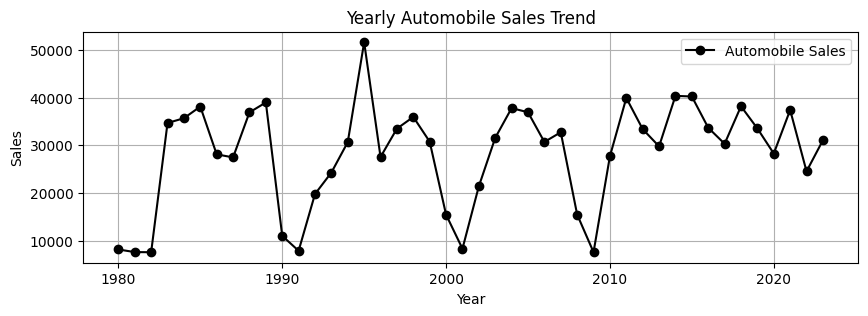

In [ ]:
# Group data by year and sum the sales if necessary
sales_by_year = auto.groupby('Year')['Automobile_Sales'].sum()

#plot the line chart
plt.figure(figsize=(10, 3))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-',color='black', label="Automobile Sales")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Yearly Automobile Sales Trend")
plt.legend()
plt.grid(True)

# show the plot
plt.show()

 2: Plot different lines for categories of vehicle type and analyze the trend
to answer the question Is there a noticeable difference in sales trends
between different vehicle types during recession periods?

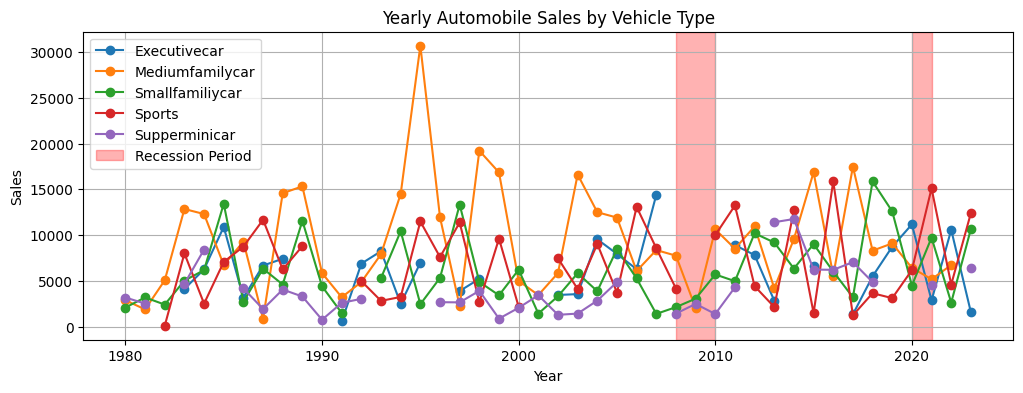

In [ ]:
# Group data by Year and Vehicle_Type, then sum sales
sales_by_year_vehicle = auto.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Define recession periods (example: 2008-2010 for the 2008 financial crisis)
recession_periods = [(2008, 2010), (2020, 2021)]

# Plot different vehicle types
plt.figure(figsize=(12,4))
for vehicle_type in sales_by_year_vehicle.columns:
    plt.plot(sales_by_year_vehicle.index, sales_by_year_vehicle[vehicle_type], marker='o', linestyle='-', label=vehicle_type)

# Highlight recession periods
for start, end in recession_periods:
    plt.axvspan(start, end, color='red', alpha=0.3, label='Recession Period' if start == 2008 else '')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Yearly Automobile Sales by Vehicle Type")
plt.legend()
plt.grid(True)

# show plot
plt.show()

3: Use the functionality of Seaborn Library to create a visualization to compare
the sales trend per vehicle type for a recession period with a non- recession
period.


In [9]:
import seaborn as sns

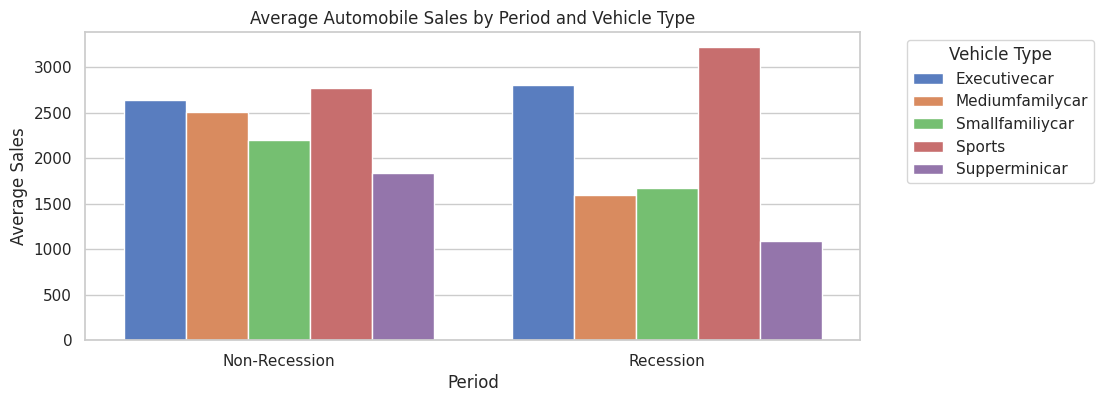

In [21]:
# Define recession years
recession_years = [2008, 2009, 2010, 2020, 2021]  # Example financial crises
auto["Period"] = auto["Year"].apply(lambda x: "Recession" if x in recession_years else "Non-Recession")

# Group by Period and Vehicle_Type, then calculate average sales
avg_sales = auto.groupby(["Period", "Vehicle_Type"])["Automobile_Sales"].mean().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x="Period", y="Automobile_Sales", hue="Vehicle_Type", data=avg_sales, palette="muted")

# Add labels and title
plt.xlabel("Period")
plt.ylabel("Average Sales")
plt.title("Average Automobile Sales by Period and Vehicle Type")
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

4: Now you want to compare the sales of different vehicle types
during a recession and a non-recession period

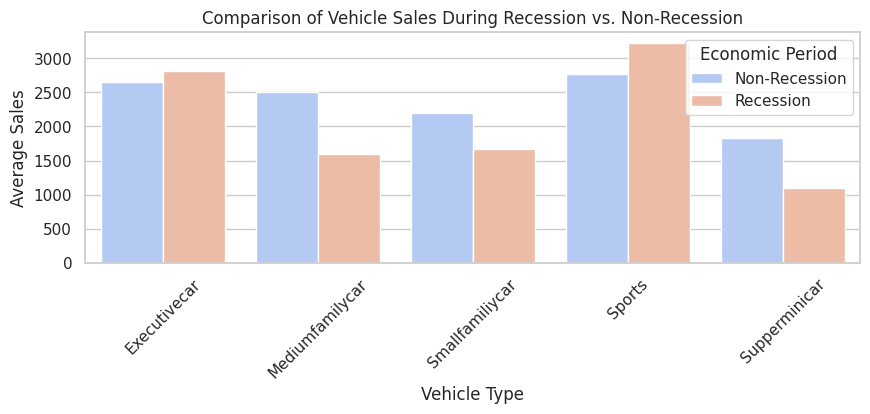

In [25]:
# Define recession years
recession_years = [2008, 2009, 2010, 2020, 2021]  # Example financial crises
auto["Period"] = auto["Year"].apply(lambda x: "Recession" if x in recession_years else "Non-Recession")

# Group by Period and Vehicle_Type, then calculate average sales
avg_sales = auto.groupby(["Period", "Vehicle_Type"])["Automobile_Sales"].mean().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 3))
sns.barplot(x="Vehicle_Type", y="Automobile_Sales", hue="Period", data=avg_sales, palette="coolwarm")

# Add labels and title
plt.xlabel("Vehicle Type")
plt.ylabel("Average Sales")
plt.title("Comparison of Vehicle Sales During Recession vs. Non-Recession")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title="Economic Period")

# show plot
plt.show()